<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!curv -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import os
os.listdir()

"curv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


['.ipynb_checkpoints',
 'Lab  - Data Visualization-v1.ipynb',
 'Lab 14 - Data Visualization-v1.ipynb',
 'survey-data.csv',
 'survey-data.sqlite']

#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [81]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [82]:
QUERY = "SELECT*FROM main"
df_original = pd.read_sql_query(QUERY, conn)
df_original.head(40)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",None,Apples,None,Primary/elementary school,"School (i.e., University, College, etc);Online...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


In [9]:
df

,COUNT(*)
0,65437


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


   CompTotal  ResponseId
0  2040000.0          73
1    28000.0         375
2    85000.0         380
3    50000.0         386
4   110000.0         390
5   126420.0         393
6    95000.0         396
7   195000.0         399
8    35000.0         404
9    54000.0         410


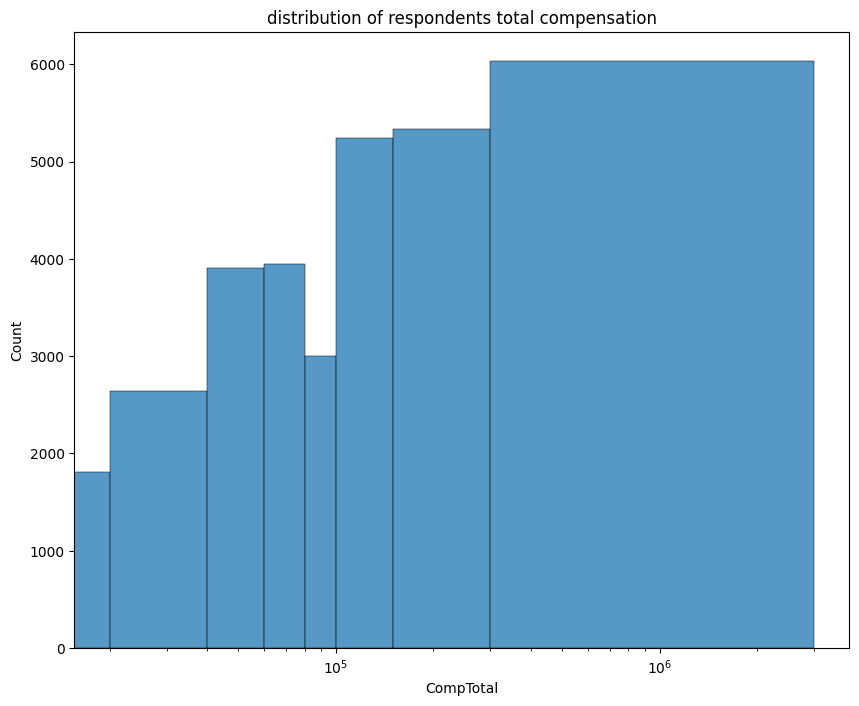

In [10]:
## Write your code here
import seaborn as sns
QUERY="""
SELECT CompTotal, ResponseId
from main
where CompTotal IS NOT NULL
"""
df_comp=pd.read_sql_query(QUERY, conn)
print(df_comp.head(10))
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 300000, 3000000]
plt.figure(figsize=(10,8))
sns.histplot(data=df_comp, x='CompTotal', bins=bins)
plt.xscale('log')
plt.title('distribution of respondents total compensation')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


    YearsCodePro  ResponseId
0           17.0           2
1           27.0           3
2            7.0           7
3           11.0          10
4           25.0          12
5           12.0          13
6           10.0          15
7           27.0          16
8            3.0          18
9           10.0          19
10          11.0          20
11           NaN          21
12          11.0          22
13          18.0          23
14          37.0          24
15          15.0          25
16          20.0          26
17          17.0          27
18           6.0          28
19          12.0          29
20           6.0          30
21           2.0          31
22           7.0          32
23           7.0          33
24          16.0          34


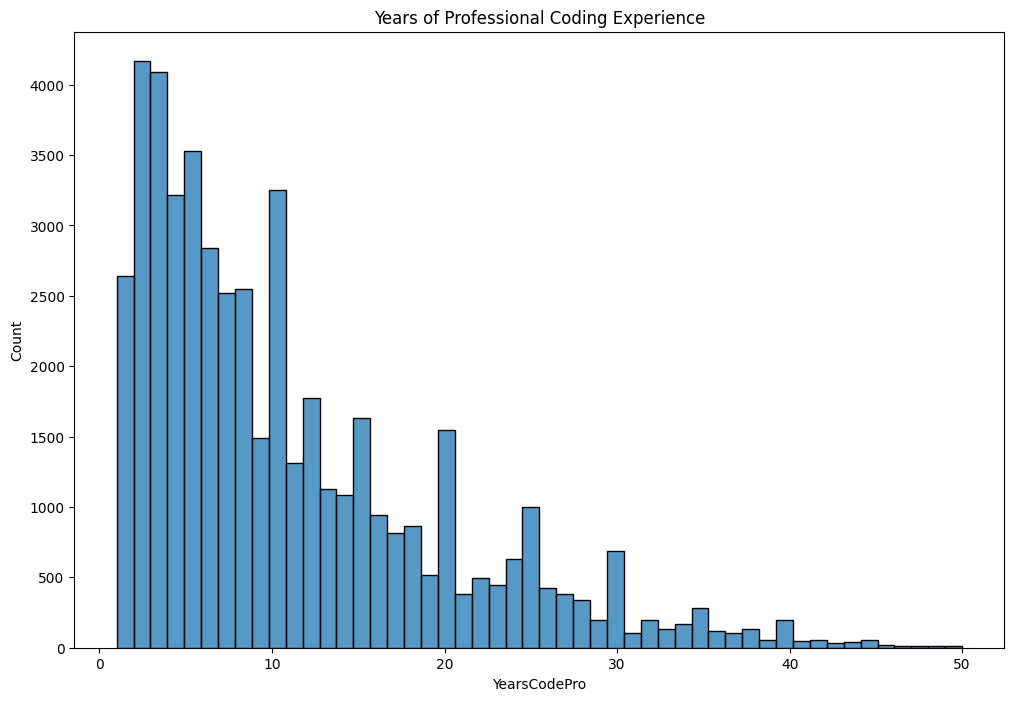

In [11]:
## Write your code here
Qu2="""
SELECT YearsCodePro, ResponseId
FROM main
where YearsCodePro IS NOT NULL"""
df_exp=pd.read_sql_query(Qu2, conn)
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
print(df_exp.head(25))
df_exp.sort_values('YearsCodePro')
plt.figure(figsize=(12,8))
sns.histplot(data=df_exp, x='YearsCodePro', bins=50)
plt.title('Years of Professional Coding Experience')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


   CompTotal              Age
0  2040000.0  18-24 years old
1    28000.0  25-34 years old
2    85000.0  35-44 years old
3    50000.0  35-44 years old
4   110000.0  25-34 years old
5   126420.0  35-44 years old
6    95000.0  45-54 years old
7   195000.0  45-54 years old
8    35000.0  35-44 years old
9    54000.0  55-64 years old


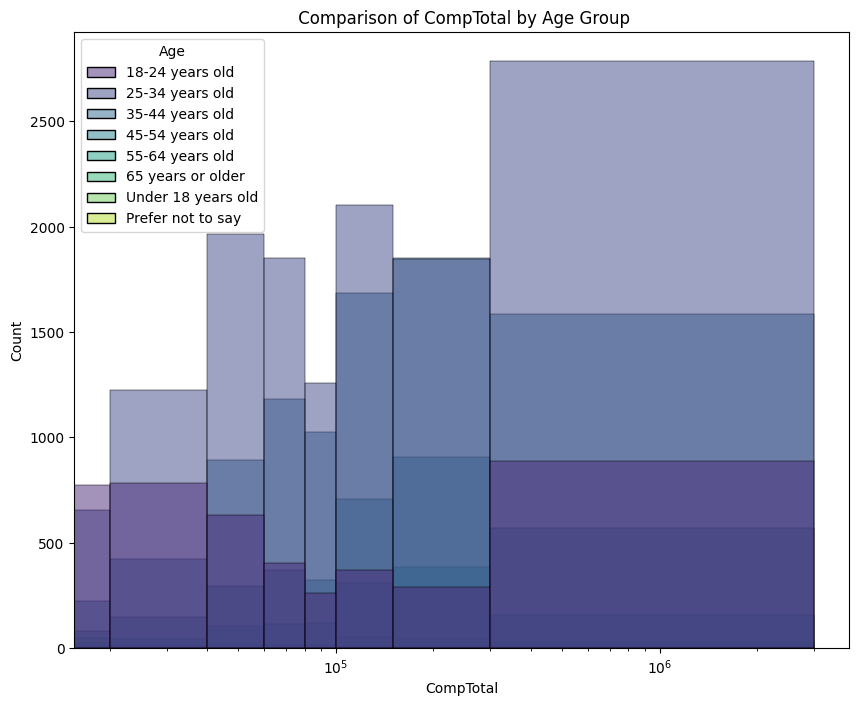

In [12]:
## Write your code here
import seaborn as sns
QUERY="""
SELECT CompTotal, Age
from main
where CompTotal IS NOT NULL
"""
df_com=pd.read_sql_query(QUERY, conn)
print(df_com.head(10))
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 300000, 3000000]
plt.figure(figsize=(10,8))
sns.histplot(data=df_com, x='CompTotal', hue='Age', palette='viridis',bins=bins)
plt.xscale('log')
plt.title(' Comparison of CompTotal by Age Group')
plt.show()

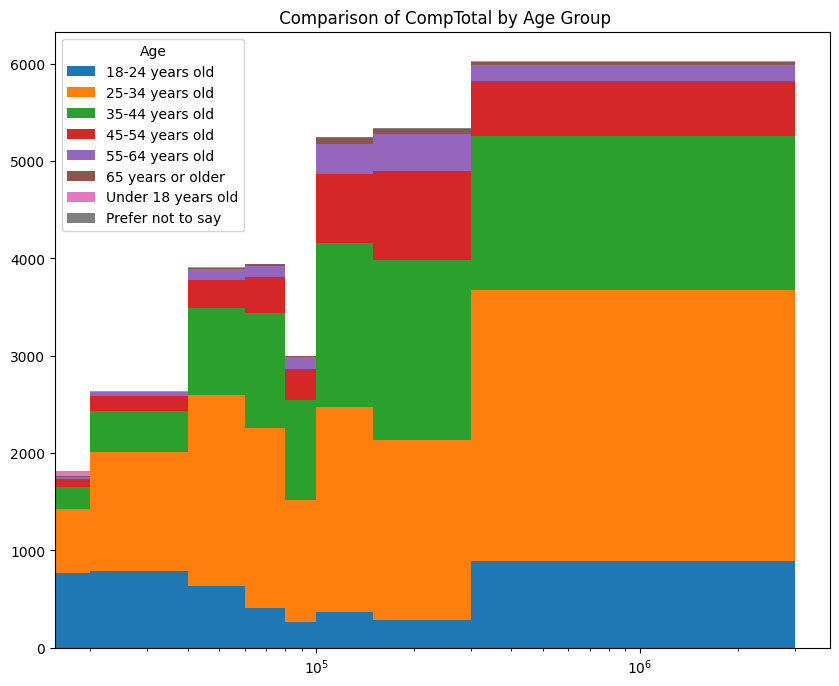

In [13]:
df_com = df_original[['CompTotal', 'Age']].dropna(subset=['CompTotal'])
uniq=df_com['Age'].unique()
colors=plt.cm.tab10(range(len(uniq)))
data=[df_com[df_com['Age']==age]['CompTotal'] for age in uniq]

bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 300000, 3000000]

plt.figure(figsize=(10,8))
plt.hist(data, bins=bins, stacked=True, color=colors, label=uniq)
plt.xscale('log')
plt.title(' Comparison of CompTotal by Age Group')
plt.legend(title='Age')
plt.show()

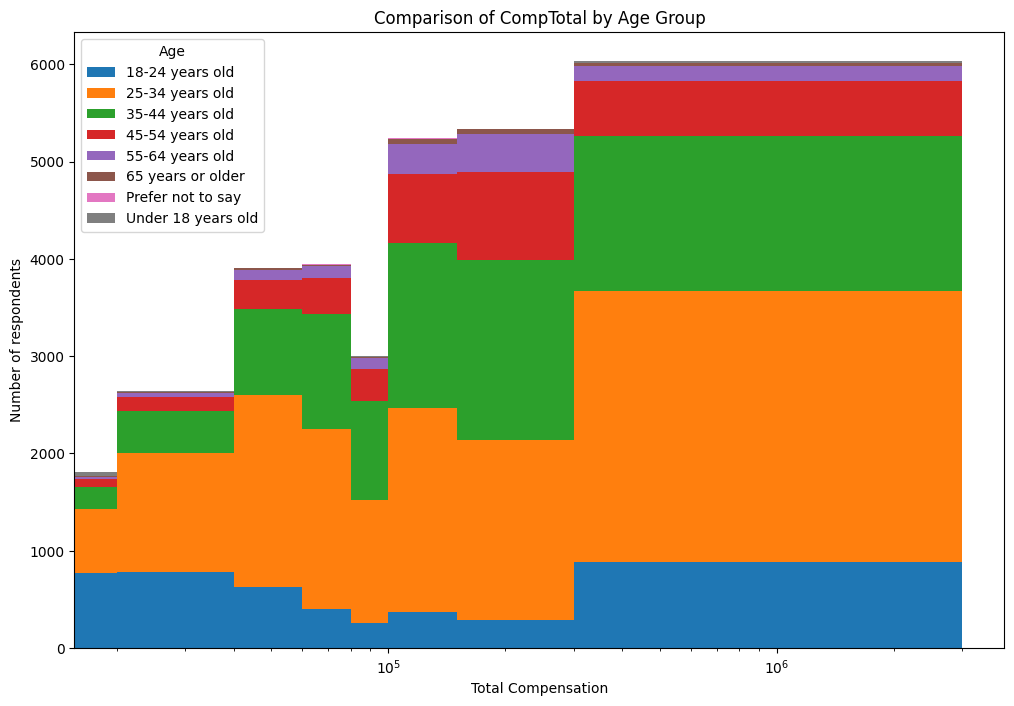

In [14]:
df_com = df_original[['CompTotal', 'Age']].dropna(subset=['CompTotal'])

bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 300000, 3000000]

# группируем по Age и сразу создаём список данных
data = df_com.groupby('Age')['CompTotal'].apply(list)

plt.figure(figsize=(12,8))
plt.hist(data, bins=bins, stacked=True, color=plt.cm.tab10(range(len(data))), label=data.index)
plt.xscale('log')
plt.xlabel('Total Compensation')
plt.ylabel('Number of respondents')
plt.title('Comparison of CompTotal by Age Group')
plt.legend(title='Age')
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [21]:
Qu3="""
select TimeSearching, Age
FROM main
where TimeSearching IS NOT NULL
"""
T_age=pd.read_sql_query(Qu3, conn)
T_age['Age'].unique()

array(['35-44 years old', '45-54 years old', '25-34 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

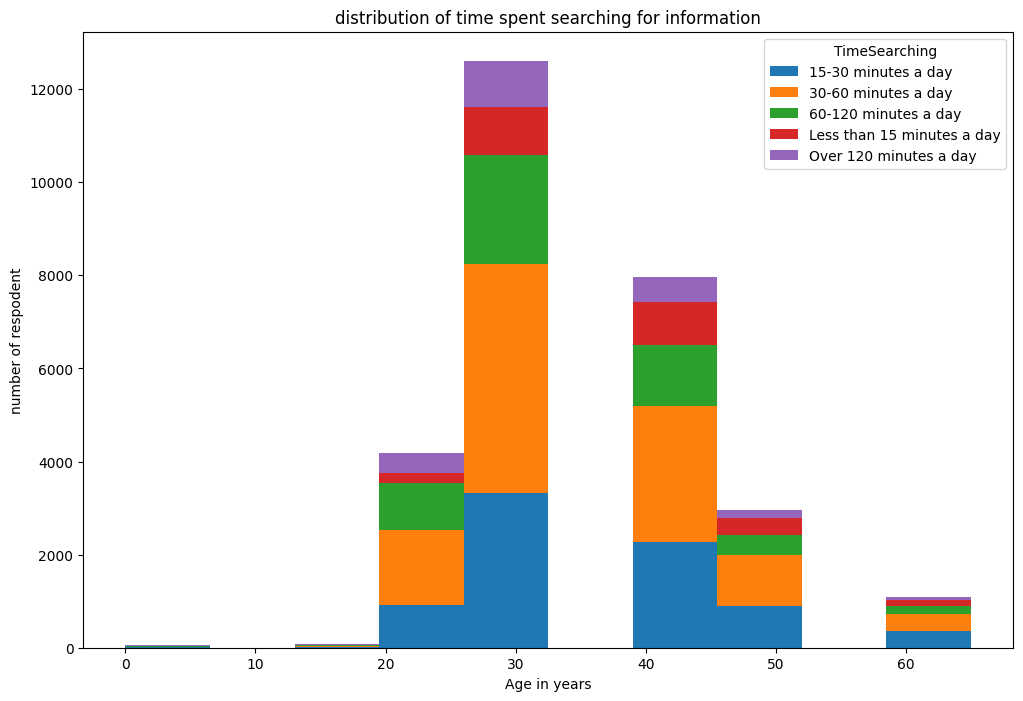

In [33]:
## Write your code here
Qu3="""
select TimeSearching, Age
FROM main
where Age IS NOT NULL
"""
T_age=pd.read_sql_query(Qu3, conn)
age={'35-44 years old':39.5,
     '45-54 years old':49.5,
     '25-34 years old':29.5,
     '55-64 years old':59.5,
     '18-24 years old':19.5,
     '65 years or older':65,
     'Prefer not to say':0,
     'Under 18 years old':15
    }
T_age['Age_num']=T_age['Age'].map(age)
data=T_age.groupby('TimeSearching')['Age_num'].apply(list)
colors=plt.cm.tab10(range(len(data)))
plt.figure(figsize=(12,8))
plt.hist(data, stacked=True, color=colors, label=data.index)
plt.title('distribution of time spent searching for information')
plt.legend(title='TimeSearching')
plt.xlabel('Age in years')
plt.ylabel('number of respodent')
plt.show()

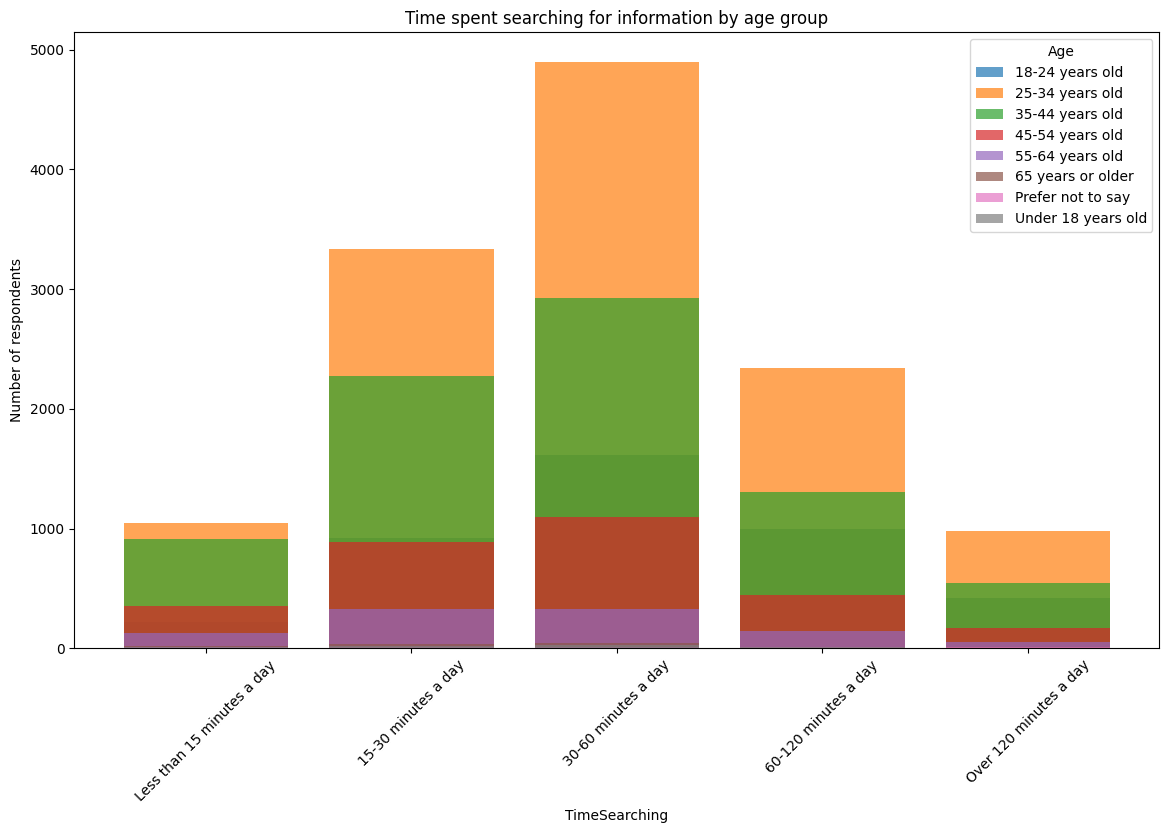

In [159]:
# SQL: подсчет количества респондентов по TimeSearching и Age
Qu_time_age = """
SELECT Age, TimeSearching, COUNT(*) AS CountResp
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
GROUP BY Age, TimeSearching
ORDER BY Age,
  CASE 
    WHEN TimeSearching = 'Less than 15 minutes a day' THEN 1
    WHEN TimeSearching = '15-30 минут в день' THEN 2
    WHEN TimeSearching = '30-60 минут в день' THEN 3
    WHEN TimeSearching = '60-120 минут в день' THEN 4
    ELSE 5
  END;
"""
data = pd.read_sql_query(Qu_time_age, conn)

plt.figure(figsize=(14,8))
ages = data['Age'].unique()
colors = plt.cm.tab10(range(len(ages)))

for i, age in enumerate(ages):
    subset = data[data['Age'] == age]
    plt.bar(
        subset['TimeSearching'],
        subset['CountResp'],
        color=colors[i],
        alpha=0.7,
        label=age
    )

plt.title('Time spent searching for information by age group')
plt.xlabel('TimeSearching')
plt.ylabel('Number of respondents')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.show()



In [130]:
Qu3="""
select TimeSearching, Age
FROM main
where Age IS NOT NULL AND TimeSearching IS NOT NULL
GROUP BY Age
ORDER BY TimeSearching DESC
"""
T_age=pd.read_sql_query(Qu3, conn)
T_age

,TimeSearching,Age
0,60-120 minutes a day,Under 18 years old
1,60-120 minutes a day,45-54 years old
2,30-60 minutes a day,65 years or older
3,30-60 minutes a day,55-64 years old
4,30-60 minutes a day,35-44 years old
5,30-60 minutes a day,18-24 years old
6,15-30 minutes a day,Prefer not to say
7,15-30 minutes a day,25-34 years old


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


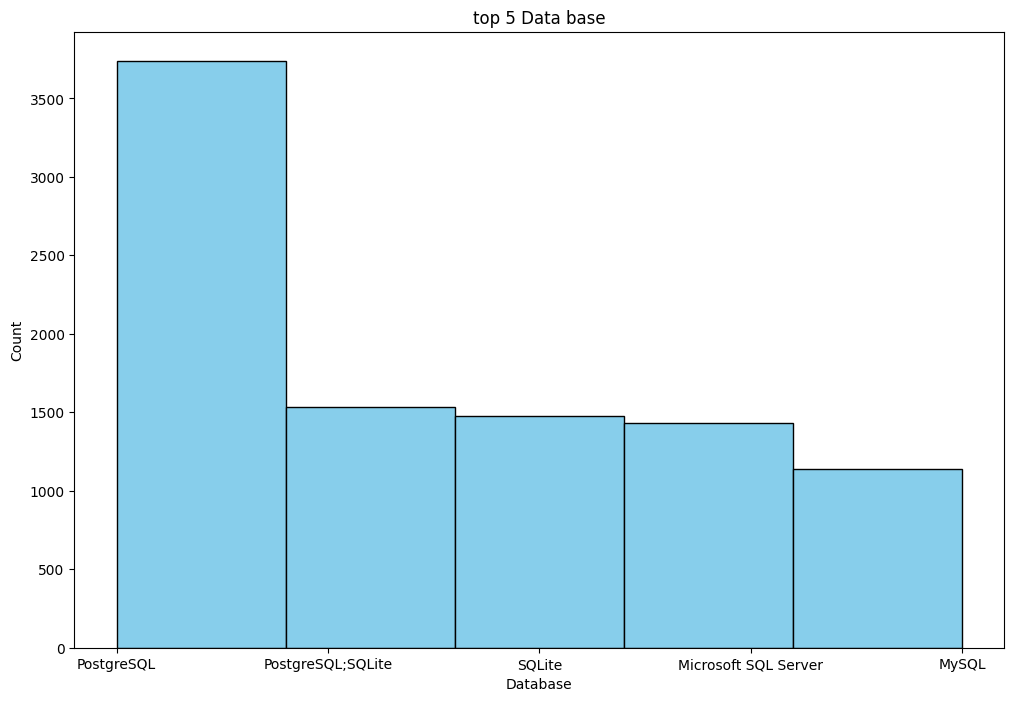

In [69]:
## Write your code here
Qu4="""
SELECT DatabaseWantToWorkWith, COUNT(*) AS Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5
"""
db=pd.read_sql_query(Qu4, conn)
counts=db['Count']
data=db['DatabaseWantToWorkWith']
plt.figure(figsize=(12,8))
plt.hist(data, bins=len(data), weights=counts, color='skyblue', edgecolor='black')
plt.title('top 5 Data base')
plt.xlabel('Database')
plt.ylabel('Count')
plt.show()

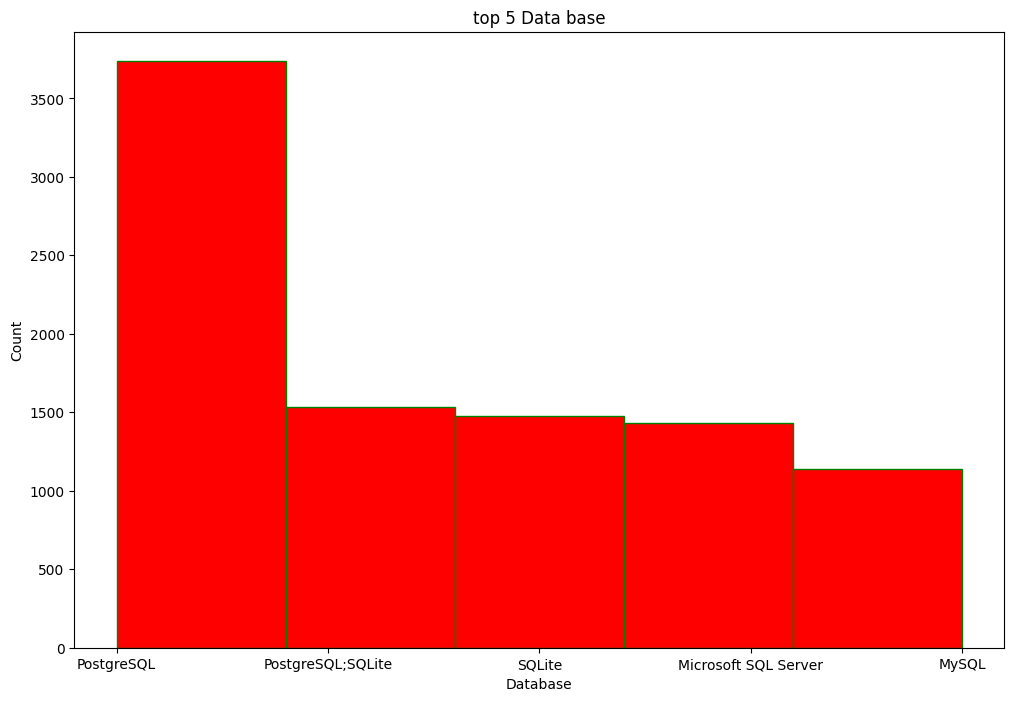

In [76]:
Qu4="""
SELECT DatabaseWantToWorkWith
FROM main
where DatabaseWantToWorkWith IS NOT NULL
"""
db=pd.read_sql_query(Qu4, conn)
db_clean = db['DatabaseWantToWorkWith'].dropna()

all_dbs = db_clean.str.split('; ').explode()
top5_db = all_dbs.value_counts().head(5)
data=top5_db.reset_index()
data.columns=[['DatabaseWantToWorkWith', 'Count']]
plt.figure(figsize=(12,8))
plt.hist(data['DatabaseWantToWorkWith'], bins=len(data),
         weights=data['Count'], color='red', edgecolor='green')
plt.title('top 5 Data base')
plt.xlabel('Database')
plt.ylabel('Count')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


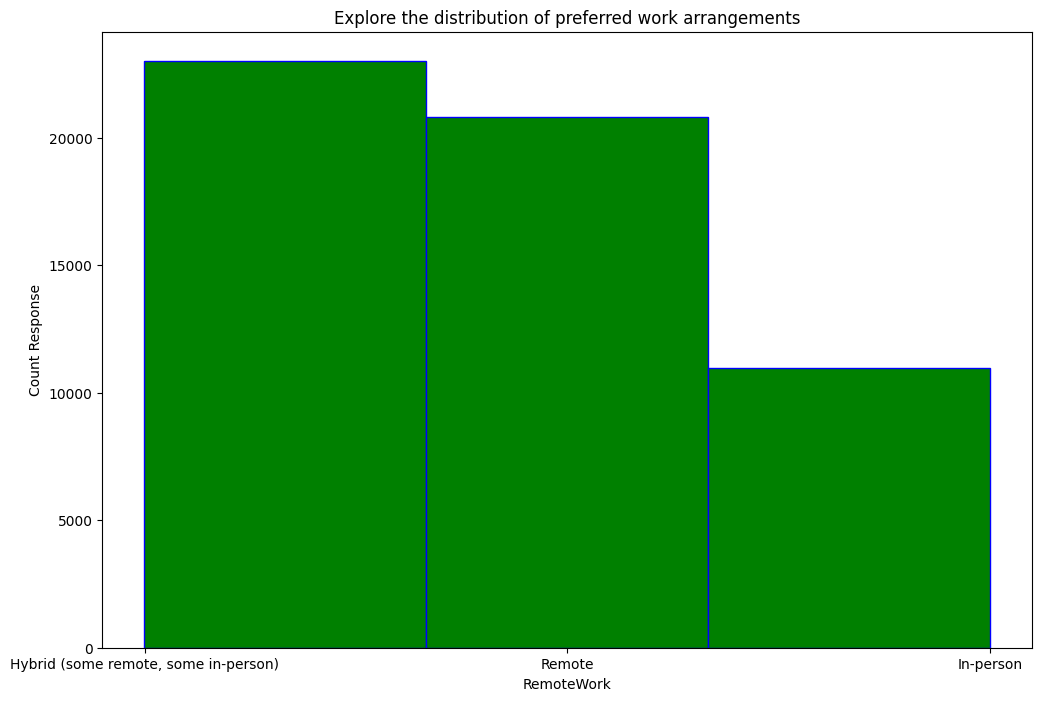

In [96]:
## Write your code here
df4=df_original[['RemoteWork']].dropna().value_counts().reset_index()
df4.columns=['RemoteWork', 'CountResp']
plt.figure(figsize=(12,8))
plt.hist(df4['RemoteWork'], bins=len(df4), weights=df4['CountResp'], color='green', edgecolor='blue')
plt.title('Explore the distribution of preferred work arrangements')
plt.xlabel('RemoteWork')
plt.ylabel('Count Response')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [118]:
Qu5="""
SELECT CompTotal, COUNT(*) AS Count
FROM main
WHERE Age BETWEEN 45 AND 60
  AND CompTotal IS NOT NULL
GROUP BY CompTotal
ORDER BY Count DESC;

"""
age_com=pd.read_sql_query(Qu5, conn)
age_com

,CompTotal,Count
0,150000.0,196
1,100000.0,191
2,200000.0,154
3,120000.0,154
4,60000.0,116
...,...,...
675,90.0,1
676,30.0,1
677,24.0,1
678,10.0,1


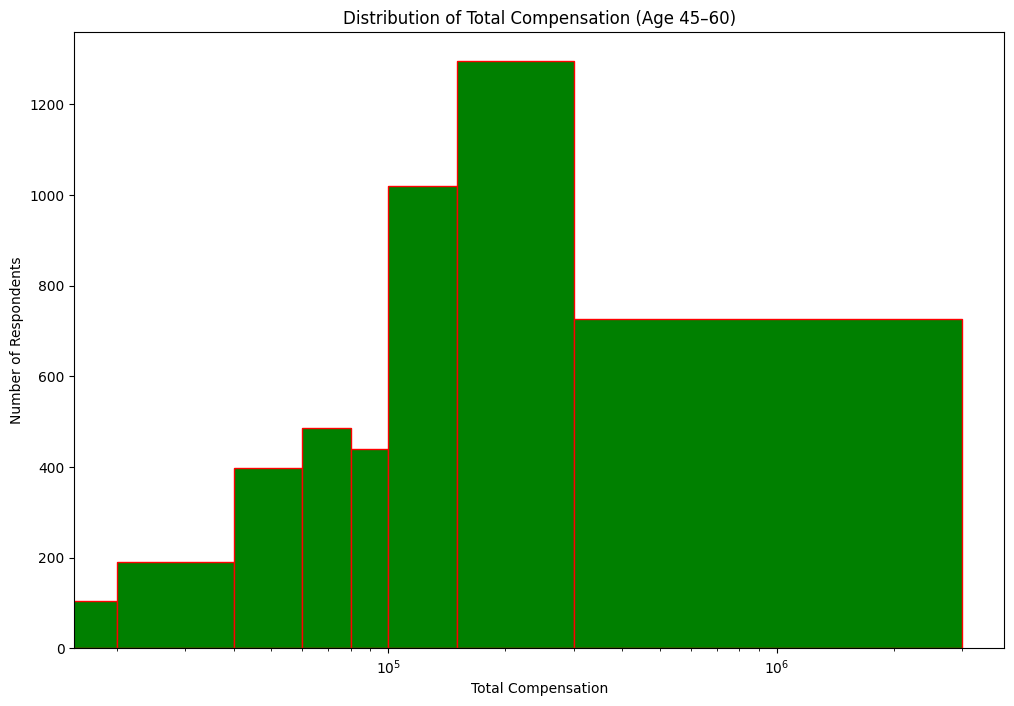

In [125]:
## Write your code here
Qu5="""
SELECT CompTotal, COUNT(*) AS Count
FROM main
WHERE Age BETWEEN 45 AND 60
  AND CompTotal IS NOT NULL
GROUP BY CompTotal
ORDER BY Count DESC;

"""
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 300000, 3000000]
cols=pd.read_sql_query(Qu5, conn)
col.columns=['CompTotal','Count']
plt.figure(figsize=(12, 8))
plt.hist(col['CompTotal'], bins=bins, weights=col['Count'], color='green', edgecolor='red')
plt.title('Distribution of Total Compensation (Age 45–60)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.xscale('log')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [190]:
## Write your code here
Qu6="""
SELECT JobSat, YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL and JobSat IS NOT NULL
GROUP BY YearsCodePro
ORDER BY YearsCodePro asc
"""
df_jy=pd.read_sql_query(Qu6, conn)
df_jy.head()

,JobSat,YearsCodePro
0,10.0,1
1,10.0,10
2,2.0,11
3,8.0,12
4,9.0,13


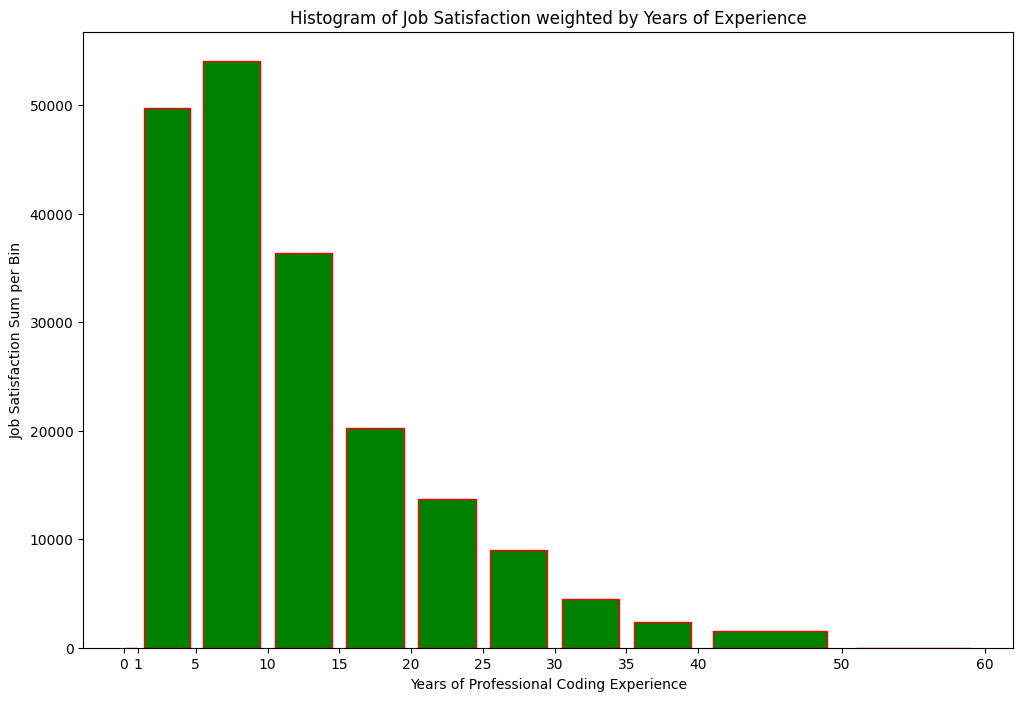

In [189]:
Qu6="""
SELECT JobSat, YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df_jy = pd.read_sql_query(Qu6, conn)

df_jy['YearsCodePro_num'] = pd.to_numeric(df_jy['YearsCodePro'], errors='coerce')

bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]

plt.figure(figsize=(12,8))
plt.hist(df_jy['YearsCodePro_num'], bins=bins, weights=df_jy['JobSat'], 
         color='green', edgecolor='red', rwidth=0.8)  

plt.title('Histogram of Job Satisfaction weighted by Years of Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Sum per Bin')
plt.xticks(bins)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [191]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
